In [ ]:
!uv pip install faster-whisper gigaam evaluate torch torchvision vosk jiwer

Using Python 3.12.12 environment at: /usr
Audited 8 packages in 237ms


# Whisper без контекста (medium)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from evaluate import load

In [ ]:
from faster_whisper import WhisperModel
import time
import os
from evaluate import load

model_size = "medium"
model = WhisperModel(model_size, device="cuda")

result = {}
for i in range(1, 11):
    wav_path = f'/content/drive/MyDrive/dataset/{i}.wav'
    start = time.time()
    segments, info = model.transcribe(wav_path, beam_size=5)
    segments = list(segments)
    dur_infer = time.time() - start

    transcript = " ".join([seg.text.strip() for seg in segments])
    audio_dur = sum([seg.end - seg.start for seg in segments])
    rtf = dur_infer / audio_dur if audio_dur > 0 else 0

    result[i] = {
        "transcript": transcript,
        "rtf": rtf
    }
    with open(f'{i}_whisper.txt', 'w', encoding='utf8') as f:
        f.write(transcript)

    print(f"{i}.wav: RTF={rtf:.3f}  |  Транскрипция: {transcript}")



1.wav: RTF=0.252  |  Транскрипция: Пилот Макса Ферстапона завоевал полупозицию в квалификации Монако, показав лучшее время в Ку-3.
2.wav: RTF=0.109  |  Транскрипция: Команда Red Bull применила undercut, чтобы обогнать Ferrari на pit stop и выйти в лидеры гонки.
3.wav: RTF=0.124  |  Транскрипция: Валиты Mercedes демонстрируют отличный баланс тормозов на трассе Silverstone, что помогает в быстрых поворотах
4.wav: RTF=0.141  |  Транскрипция: Льюис Хэмильтон лидировал весь гран-при, завоевав большой шлем с лучшим кругом и победой.
5.wav: RTF=0.111  |  Транскрипция: В спринтрейсе пилоты ХАС столкнулись с ДРС зоной, но не смогли активировать систему из-за разницы в скорости.
6.wav: RTF=0.137  |  Транскрипция: Charles Leclerc прошел apex в повороте гурбопараболика идеально, минимизируя временно круги
7.wav: RTF=0.148  |  Транскрипция: Команда Alpine выбрала стратегию с двумя бит-стопами на медиум-шинах, чтобы избежать износа в жаркую погоду.
8.wav: RTF=0.197  |  Транскрипция: Sergio Perez пол

In [ ]:
wers = []
cers = []
rtfs = []

wer_metric = load("wer")
cer_metric = load("cer")
for i in range(1, 11):
    with open(f'/content/drive/MyDrive/dataset/{i}.txt', 'r', encoding='utf8') as f:
        reference = f.read().strip()
    prediction = result[i]['transcript']

    wer = wer_metric.compute(references=[reference], predictions=[prediction])
    cer = cer_metric.compute(references=[reference], predictions=[prediction])
    rtf = result[i]['rtf']

    wers.append(wer)
    cers.append(cer)
    rtfs.append(rtf)

    print(f"{i}.wav: WER={wer:.3f} CER={cer:.3f} RTF={rtf:.3f}")

print(f"\nСреднее по метрикам:")
print(f"Средний WER = {sum(wers) / len(wers):.3f}")
print(f"Средний CER = {sum(cers) / len(cers):.3f}")
print(f"Средний RTF = {sum(rtfs) / len(rtfs):.3f}")


1.wav: WER=0.231 CER=0.063 RTF=0.252
2.wav: WER=0.467 CER=0.344 RTF=0.109
3.wav: WER=0.214 CER=0.207 RTF=0.124
4.wav: WER=0.231 CER=0.034 RTF=0.141
5.wav: WER=0.312 CER=0.064 RTF=0.111
6.wav: WER=0.615 CER=0.311 RTF=0.137
7.wav: WER=0.200 CER=0.075 RTF=0.148
8.wav: WER=0.357 CER=0.138 RTF=0.197
9.wav: WER=0.312 CER=0.070 RTF=0.265
10.wav: WER=0.143 CER=0.064 RTF=0.231

Среднее по метрикам:
Средний WER = 0.308
Средний CER = 0.137
Средний RTF = 0.171


# Whisper с контекстом (medium)

In [ ]:
model_size = "medium"
model = WhisperModel(model_size, device="cuda")


initial_prompt = "Это аудиозапись на тематику Формулы 1. Здесь обсуждаются гонщики, "
"команды, гоночные стратегии. Транскрибировать спортивное аудио по Формуле-1."
"Основные термины: Ред Булл, Феррари, Ку-3, пит-стоп, андеркат, болид, квалификация, стратегия, трасса, апекс, медиа-шины,
"большой шлем, ДРС-зона, виртуальный сейфти-кар, прижимная сила, аэродинамика Все названия на русском языке ."

result = {}
for i in range(1, 11):
    wav_path = f'/content/drive/MyDrive/dataset/{i}.wav'

    start = time.time()
    segments, info = model.transcribe(wav_path, beam_size=5, initial_prompt=initial_prompt)
    segments = list(segments)
    dur_infer = time.time() - start

    transcript = " ".join([seg.text.strip() for seg in segments])
    audio_dur = sum([seg.end - seg.start for seg in segments])
    rtf = dur_infer / audio_dur if audio_dur > 0 else 0

    result[i] = {
        "transcript": transcript,
        "rtf": rtf
    }

    with open(f'{i}_whisper_with_prompt.txt', 'w', encoding='utf8') as f:
        f.write(transcript)

    print(f"{i}.wav: RTF={rtf:.3f}  |  Транскрипция: {transcript}")


1.wav: RTF=0.157  |  Транскрипция: пилот Макса Ферстапона завоевал полупозицию в квалификации Монако, показав лучшее время в Ку-3.
2.wav: RTF=0.201  |  Транскрипция: команды Red Bull применила undercut, чтобы обогнать Ferrari на pit stop и выйти в лидеры гонки.
3.wav: RTF=0.157  |  Транскрипция: Валиты Mercedes демонстрируют отличный баланс тормозов на трассе Silverstone, что помогает в быстрых поворотах.
4.wav: RTF=0.167  |  Транскрипция: Льюис Хэмильтон лидировал весь гран-при, завоевав большой шлем с лучшим кругом и победой.
5.wav: RTF=0.114  |  Транскрипция: в спринтрейсе пилоты ХАС столкнулись с ДРС зоной, но не смогли активировать систему из-за разницы в скорости.
6.wav: RTF=0.132  |  Транскрипция: шарликлер прошел апекс в повороте гурбопараболика идеально, минимизируя временно круги.
7.wav: RTF=0.149  |  Транскрипция: Команда Альпин выбрала стратегию с двумя бит-стопами на медиум-шинах, чтобы избежать износа в жаркую погоду.
8.wav: RTF=0.139  |  Транскрипция: Серхио Перес получи

In [ ]:
wers = []
cers = []
rtfs = []
wer_metric = load("wer")
cer_metric = load("cer")

for i in range(1, 11):
    with open(f'/content/drive/MyDrive/dataset/{i}.txt') as f:
        reference = f.read().strip()
    prediction = result[i]['transcript']

    wer = wer_metric.compute(references=[reference], predictions=[prediction])
    cer = cer_metric.compute(references=[reference], predictions=[prediction])

    wers.append(wer)
    cers.append(cer)
    rtfs.append(rtf)

    print(f"{i}.wav: WER={wer:.3f} CER={cer:.3f} RTF={result[i]['rtf']:.3f}")

print(f"\nСреднее по метрикам:")
print(f"Средний WER = {sum(wers) / len(wers):.3f}")
print(f"Средний CER = {sum(cers) / len(cers):.3f}")
print(f"Средний RTF = {sum(rtfs) / len(rtfs):.3f}")


1.wav: WER=0.308 CER=0.074 RTF=0.157
2.wav: WER=0.533 CER=0.366 RTF=0.201
3.wav: WER=0.286 CER=0.216 RTF=0.157
4.wav: WER=0.231 CER=0.034 RTF=0.167
5.wav: WER=0.375 CER=0.073 RTF=0.114
6.wav: WER=0.538 CER=0.167 RTF=0.132
7.wav: WER=0.133 CER=0.019 RTF=0.149
8.wav: WER=0.214 CER=0.021 RTF=0.139
9.wav: WER=0.375 CER=0.093 RTF=0.122
10.wav: WER=0.214 CER=0.072 RTF=0.122

Среднее по метрикам:
Средний WER = 0.321
Средний CER = 0.113
Средний RTF = 0.122


# Whisper без контекста (large)

In [ ]:
from faster_whisper import WhisperModel
import time
import os
from evaluate import load

model_size = "large"
model = WhisperModel(model_size, device="cuda")

result = {}
for i in range(1, 11):
    wav_path = f'/content/drive/MyDrive/dataset/{i}.wav'
    start = time.time()
    segments, info = model.transcribe(wav_path, beam_size=5)
    segments = list(segments)
    dur_infer = time.time() - start

    transcript = " ".join([seg.text.strip() for seg in segments])
    audio_dur = sum([seg.end - seg.start for seg in segments])
    rtf = dur_infer / audio_dur if audio_dur > 0 else 0

    result[i] = {
        "transcript": transcript,
        "rtf": rtf
    }
    with open(f'{i}_whisper_small.txt', 'w', encoding='utf8') as f:
        f.write(transcript)

    print(f"{i}.wav: RTF={rtf:.3f}  |  Транскрипция: {transcript}")



1.wav: RTF=0.274  |  Транскрипция: Пилот Макса Верстапена завоевал полу-позицию в квалификации Монако, показав лучшее время в Ку-3.
2.wav: RTF=0.183  |  Транскрипция: Команда Red Bull применила андеркат, чтобы обогнать Феррари на питстопе и выйти в лидеры гонки.
3.wav: RTF=0.188  |  Транскрипция: Болиды Mercedes демонстрируют отличный баланс тормозов на трассе Silverstone, что помогает в быстрых поворотах.
4.wav: RTF=0.213  |  Транскрипция: Льюис Хэмилтон лидировал весь гран-при, завоевав большой шлем с лучшим кругом и победой.
5.wav: RTF=0.165  |  Транскрипция: В спринтрейсе пилоты ХАС столкнулись с ДРС-зоной, но не смогли активировать систему из-за разницы в скорости.
6.wav: RTF=0.184  |  Транскрипция: Шарль Леклер прошел апекс в повороте курва параболика идеально, минимизируя время на круге.
7.wav: RTF=0.213  |  Транскрипция: Команда Альпин выбрала стратегию с двумя питстопами на медиум шинах, чтобы избежать износа в жаркую погоду.
8.wav: RTF=0.215  |  Транскрипция: Серхио Перес пол

In [ ]:
wers = []
cers = []
rtfs = []

for i in range(1, 11):
    with open(f'/content/drive/MyDrive/dataset/{i}.txt', 'r', encoding='utf8') as f:
        reference = f.read().strip()
    prediction = result[i]['transcript']

    wer = wer_metric.compute(references=[reference], predictions=[prediction])
    cer = cer_metric.compute(references=[reference], predictions=[prediction])
    rtf = result[i]['rtf']

    wers.append(wer)
    cers.append(cer)
    rtfs.append(rtf)

    print(f"{i}.wav: WER={wer:.3f} CER={cer:.3f} RTF={rtf:.3f}")

print(f"\nСреднее по метрикам:")
print(f"Средний WER = {sum(wers) / len(wers):.3f}")
print(f"Средний CER = {sum(cers) / len(cers):.3f}")
print(f"Средний RTF = {sum(rtfs) / len(rtfs):.3f}")


1.wav: WER=0.231 CER=0.063 RTF=0.274
2.wav: WER=0.333 CER=0.108 RTF=0.183
3.wav: WER=0.214 CER=0.189 RTF=0.188
4.wav: WER=0.154 CER=0.023 RTF=0.213
5.wav: WER=0.188 CER=0.055 RTF=0.165
6.wav: WER=0.231 CER=0.033 RTF=0.184
7.wav: WER=0.267 CER=0.028 RTF=0.213
8.wav: WER=0.071 CER=0.011 RTF=0.215
9.wav: WER=0.312 CER=0.081 RTF=0.179
10.wav: WER=0.143 CER=0.064 RTF=0.175

Среднее по метрикам:
Средний WER = 0.214
Средний CER = 0.065
Средний RTF = 0.199


# Whisper с контекстом (large)

In [ ]:
model_size = "large"
model = WhisperModel(model_size, device="cuda")

initial_prompt = "Это аудиозапись на тематику Формулы 1. Здесь обсуждаются гонщики, "
"команды, гоночные стратегии. Транскрибировать спортивное аудио по Формуле-1."
"Основные термины: Ред Булл, Феррари, Ку-3, пит-стоп, андеркат, болид, квалификация, стратегия, трасса, апекс, медиа-шины,
"большой шлем, ДРС-зона, виртуальный сейфти-кар, прижимная сила, аэродинамика Все названия на русском языке ."

result = {}
for i in range(1, 11):
    wav_path = f'/content/drive/MyDrive/dataset/{i}.wav'

    start = time.time()
    segments, info = model.transcribe(wav_path, beam_size=5, initial_prompt=initial_prompt)
    segments = list(segments)
    dur_infer = time.time() - start

    transcript = " ".join([seg.text.strip() for seg in segments])
    audio_dur = sum([seg.end - seg.start for seg in segments])
    rtf = dur_infer / audio_dur if audio_dur > 0 else 0

    result[i] = {
        "transcript": transcript,
        "rtf": rtf
    }

    with open(f'{i}_whisper_with_prompt_small.txt', 'w', encoding='utf8') as f:
        f.write(transcript)

    print(f"{i}.wav: RTF={rtf:.3f}  |  Транскрипция: {transcript}")

1.wav: RTF=0.217  |  Транскрипция: пилот Макса Верстапена завоевал полу-позицию в квалификации Монако, показав лучшее время в Ку-3.
2.wav: RTF=0.186  |  Транскрипция: Команда Red Bull применила андеркат, чтобы обогнать Феррари на питстопе и выйти в лидеры гонки.
3.wav: RTF=0.197  |  Транскрипция: Болиды Mercedes демонстрируют отличный баланс тормозов на трассе Silverstone, что помогает в быстрых поворотах.
4.wav: RTF=0.234  |  Транскрипция: Льюис Хэмилтон лидировал весь гран-при, завоевав большой шлем с лучшим кругом и победой.
5.wav: RTF=0.178  |  Транскрипция: В спринтрейсе пилоты ХАС столкнулись с ДРС-зоной, но не смогли активировать систему из-за разницы в скорости.
6.wav: RTF=0.183  |  Транскрипция: Шарль Леклер прошел апекс в повороте курва параболика, идеально, минимизируя время на круге.
7.wav: RTF=0.208  |  Транскрипция: Команда Альпин выбрала стратегию с двумя питстопами на медиум шинах, чтобы избежать износа в жаркую погоду.
8.wav: RTF=0.196  |  Транскрипция: Серхио Перес по

In [ ]:
wers = []
cers = []
rtfs = []

for i in range(1, 11):
    with open(f'/content/drive/MyDrive/dataset/{i}.txt', 'r', encoding='utf8') as f:
        reference = f.read().strip()
    prediction = result[i]['transcript']

    wer = wer_metric.compute(references=[reference], predictions=[prediction])
    cer = cer_metric.compute(references=[reference], predictions=[prediction])
    rtf = result[i]['rtf']

    wers.append(wer)
    cers.append(cer)
    rtfs.append(rtf)

    print(f"{i}.wav: WER={wer:.3f} CER={cer:.3f} RTF={rtf:.3f}")

print(f"\nСреднее по метрикам:")
print(f"Средний WER = {sum(wers) / len(wers):.3f}")
print(f"Средний CER = {sum(cers) / len(cers):.3f}")
print(f"Средний RTF = {sum(rtfs) / len(rtfs):.3f}")


1.wav: WER=0.308 CER=0.074 RTF=0.217
2.wav: WER=0.333 CER=0.108 RTF=0.186
3.wav: WER=0.214 CER=0.189 RTF=0.197
4.wav: WER=0.154 CER=0.023 RTF=0.234
5.wav: WER=0.188 CER=0.055 RTF=0.178
6.wav: WER=0.231 CER=0.044 RTF=0.183
7.wav: WER=0.267 CER=0.028 RTF=0.208
8.wav: WER=0.071 CER=0.011 RTF=0.196
9.wav: WER=0.312 CER=0.081 RTF=0.172
10.wav: WER=0.143 CER=0.064 RTF=0.177

Среднее по метрикам:
Средний WER = 0.222
Средний CER = 0.068
Средний RTF = 0.195


# Vosk

In [ ]:
!wget https://alphacephei.com/vosk/models/vosk-model-small-ru-0.22.zip
!unzip /content/vosk-model-small-ru-0.22.zip

--2025-10-19 21:31:09--  https://alphacephei.com/vosk/models/vosk-model-small-ru-0.22.zip
Resolving alphacephei.com (alphacephei.com)... 188.40.21.16, 2a01:4f8:13a:279f::2
Connecting to alphacephei.com (alphacephei.com)|188.40.21.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46236750 (44M) [application/zip]
Saving to: ‘vosk-model-small-ru-0.22.zip’

vosk-model-small-ru 100%[===================>]  44.09M  14.5MB/s    in 3.2s    

2025-10-19 21:31:13 (13.9 MB/s) - ‘vosk-model-small-ru-0.22.zip’ saved [46236750/46236750]

Archive:  /content/vosk-model-small-ru-0.22.zip
   creating: vosk-model-small-ru-0.22/
   creating: vosk-model-small-ru-0.22/graph/
   creating: vosk-model-small-ru-0.22/graph/phones/
  inflating: vosk-model-small-ru-0.22/graph/phones/word_boundary.int  
  inflating: vosk-model-small-ru-0.22/graph/Gr.fst  
  inflating: vosk-model-small-ru-0.22/graph/HCLr.fst  
  inflating: vosk-model-small-ru-0.22/graph/disambig_tid.int  
   creating: vosk-

In [ ]:
import os
import time
from vosk import Model, KaldiRecognizer
import wave


model = Model(model_path=r"/content/vosk-model-small-ru-0.22")

result = {}

wer_metric = load("wer")
cer_metric = load("cer")

for i in range(1, 11):
    wav_path = f'/content/drive/MyDrive/dataset/{i}.wav'
    wf = wave.open(wav_path, "rb")

    rec = KaldiRecognizer(model, wf.getframerate())
    rec.SetWords(True)

    start = time.time()

    transcript = ""
    while True:
        data = wf.readframes(4000)
        if len(data) == 0:
            break
        if rec.AcceptWaveform(data):
            res = rec.Result()
            # Можно распарсить JSON, но берем текст просто
            import json
            jres = json.loads(res)
            transcript += " " + jres.get("text", "")

    transcript += " " + json.loads(rec.FinalResult()).get("text", "")

    dur_infer = time.time() - start
    audio_dur = wf.getnframes() / wf.getframerate()
    rtf = dur_infer / audio_dur if audio_dur > 0 else 0

    result[i] = {"transcript": transcript.strip(), "rtf": rtf}
    with open(f'{i}_vosk.txt', 'w', encoding='utf8') as f:
        f.write(transcript)

    print(f"{i}.wav: RTF={rtf:.3f}  |  Транскрипция: {transcript.strip()}")


1.wav: RTF=0.210  |  Транскрипция: пилот макса перста по на завоевал поул позицию в квалификации монако показав лучшее время вку три
2.wav: RTF=0.148  |  Транскрипция: команда ред булл применила андер кат чтобы обогнать феррари на пит стоп и и выйти в лидеры гонки
3.wav: RTF=0.168  |  Транскрипция: болиды мерседес демонстрирует отличный баланс тормозов на трассе сильверстоун что помогает быстрых поворотах
4.wav: RTF=0.162  |  Транскрипция: льюис хэмилтон лидировал без гран при завоевав большой шлем с лучшим кругом и победой
5.wav: RTF=0.129  |  Транскрипция: с принят трейси пилоты и хаос столкнулись с зоной но не смогли активировать систему из-за разницы в скорости
6.wav: RTF=0.144  |  Транскрипция: а шара для клер прошёл апекс повороте курва пора борька идеально минимизирует временно круге
7.wav: RTF=0.139  |  Транскрипция: команда альбин выбрала стратегию с двумя питт стопами на медиум шинах чтобы избежать износом жаркую погоду
8.wav: RTF=0.144  |  Транскрипция: серхио перес получил 

In [ ]:
# Оценка WER, CER
wers = []
cers = []
rtfs = []

for i in range(1, 11):
    with open(f'/content/drive/MyDrive/dataset/{i}.txt', 'r', encoding='utf8') as f:
        reference = f.read().strip()

    prediction = result[i]['transcript']

    wer = wer_metric.compute(references=[reference], predictions=[prediction])
    cer = cer_metric.compute(references=[reference], predictions=[prediction])
    rtf = result[i]['rtf']

    wers.append(wer)
    cers.append(cer)
    rtfs.append(rtf)

    print(f"{i}.wav: WER={wer:.3f} CER={cer:.3f} RTF={rtf:.3f}")

print(f"\nСреднее по метрикам:")
print(f"Средний WER = {sum(wers) / len(wers):.3f}")
print(f"Средний CER = {sum(cers) / len(cers):.3f}")
print(f"Средний RTF = {sum(rtfs) / len(rtfs):.3f}")


1.wav: WER=0.769 CER=0.147 RTF=0.210
2.wav: WER=0.600 CER=0.108 RTF=0.148
3.wav: WER=0.357 CER=0.063 RTF=0.168
4.wav: WER=0.385 CER=0.092 RTF=0.162
5.wav: WER=0.375 CER=0.127 RTF=0.129
6.wav: WER=0.923 CER=0.267 RTF=0.144
7.wav: WER=0.533 CER=0.093 RTF=0.139
8.wav: WER=0.357 CER=0.085 RTF=0.144
9.wav: WER=0.562 CER=0.372 RTF=0.174
10.wav: WER=0.429 CER=0.080 RTF=0.213

Среднее по метрикам:
Средний WER = 0.529
Средний CER = 0.143
Средний RTF = 0.163


# Giga AM

In [ ]:
import gigaam
model = gigaam.load_model("v2_rnnt")
print(model)


/usr/local/lib/python3.12/dist-packages/gigaam/__init__.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location="cpu")


GigaAMASR(
  (preprocessor): FeatureExtractor(
    (featurizer): Sequential(
      (0): MelSpectrogram(
        (spectrogram): Spectrogram()
        (mel_scale): MelScale()
      )
      (1): SpecScaler()
    )
  )
  (encoder): ConformerEncoder(
    (pre_encode): StridingSubsampling(
      (out): Linear(in_features=12288, out_features=768, bias=True)
      (conv): Sequential(
        (0): Conv2d(1, 768, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (1): ReLU()
        (2): Conv2d(768, 768, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (3): ReLU()
      )
    )
    (pos_enc): RotaryPositionalEmbedding()
    (layers): ModuleList(
      (0-15): 16 x ConformerLayer(
        (norm_feed_forward1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (feed_forward1): ConformerFeedForward(
          (linear1): Linear(in_features=768, out_features=3072, bias=True)
          (activation): SiLU()
          (linear2): Linear(in_features=3072, out_features=768, bi

In [ ]:
import gigaam
import time
import os
from evaluate import load

model = gigaam.load_model('v2_rnnt')
result = {}

wer_metric = load("wer")
cer_metric = load("cer")

for i in range(1, 11):
    wav_path = f'/content/drive/MyDrive/dataset/{i}.wav'
    start = time.time()
    transcript = model.transcribe(wav_path)  # метод транскрипции зависит от SDK
    dur_infer = time.time() - start

    # Чтобы получить длительность аудио, например с wave:
    import wave
    with wave.open(wav_path, 'rb') as wf:
        audio_dur = wf.getnframes() / wf.getframerate()

    rtf = dur_infer / audio_dur if audio_dur > 0 else 0

    result[i] = {"transcript": transcript.strip(), "rtf": rtf}

    # Сохраняем результат
    with open(f'{i}_gigaam.txt', 'w', encoding='utf8') as f:
        f.write(transcript)

    print(f"{i}.wav: RTF={rtf:.3f}  |  Транскрипция: {transcript.strip()}")


/usr/local/lib/python3.12/dist-packages/gigaam/__init__.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location="cpu")


1.wav: RTF=0.035  |  Транскрипция: пилот макса верстапона завоевал полупозицию в квалификации монако показав лучшее время в ку три
2.wav: RTF=0.033  |  Транскрипция: команда ред бул применила андеркад чтобы обогнать феррари на пит стопе и выйти в лидеры гонки
3.wav: RTF=0.035  |  Транскрипция: болиды мерседес демонстрируют отличный баланс тормозов на трассе сильверстоун что помогает в быстрых поворотах
4.wav: RTF=0.038  |  Транскрипция: льюис хемильтон лидировал весь гран при завоевав большой шлем с лучшим кругом и победой
5.wav: RTF=0.030  |  Транскрипция: в спринтрейсе пилоты хасс столкнулись с дрс зоной но не смогли активировать систему из за разницы в скорости
6.wav: RTF=0.032  |  Транскрипция: шар ликлер прошел апекс в повороте курва параболика идеально минимизируй время на круге
7.wav: RTF=0.033  |  Транскрипция: команда альпин выбрала стратегию с двумя питстопами на медиум шинах чтобы избежать износа в жаркую погоду
8.wav: RTF=0.034  |  Транскрипция: серхио перес получил штраф з

In [ ]:
# Вычисляем метрики
wers = []
cers = []
rtfs = []

for i in range(1, 11):
    with open(f'/content/drive/MyDrive/dataset/{i}.txt', 'r', encoding='utf8') as f:
        reference = f.read().strip()

    prediction = result[i]['transcript']
    wer = wer_metric.compute(references=[reference], predictions=[prediction])
    cer = cer_metric.compute(references=[reference], predictions=[prediction])
    rtf = result[i]['rtf']

    wers.append(wer)
    cers.append(cer)
    rtfs.append(rtf)

    print(f"{i}.wav: WER={wer:.3f} CER={cer:.3f} RTF={rtf:.3f}")

print(f"\nСреднее по метрикам:")
print(f"Средний WER = {sum(wers) / len(wers):.3f}")
print(f"Средний CER = {sum(cers) / len(cers):.3f}")
print(f"Средний RTF = {sum(rtfs) / len(rtfs):.3f}")


1.wav: WER=0.538 CER=0.147 RTF=0.035
2.wav: WER=0.400 CER=0.075 RTF=0.033
3.wav: WER=0.214 CER=0.036 RTF=0.035
4.wav: WER=0.308 CER=0.080 RTF=0.038
5.wav: WER=0.438 CER=0.082 RTF=0.030
6.wav: WER=0.462 CER=0.100 RTF=0.032
7.wav: WER=0.333 CER=0.047 RTF=0.033
8.wav: WER=0.214 CER=0.043 RTF=0.034
9.wav: WER=0.562 CER=0.349 RTF=0.032
10.wav: WER=0.286 CER=0.048 RTF=0.032

Среднее по метрикам:
Средний WER = 0.376
Средний CER = 0.101
Средний RTF = 0.033


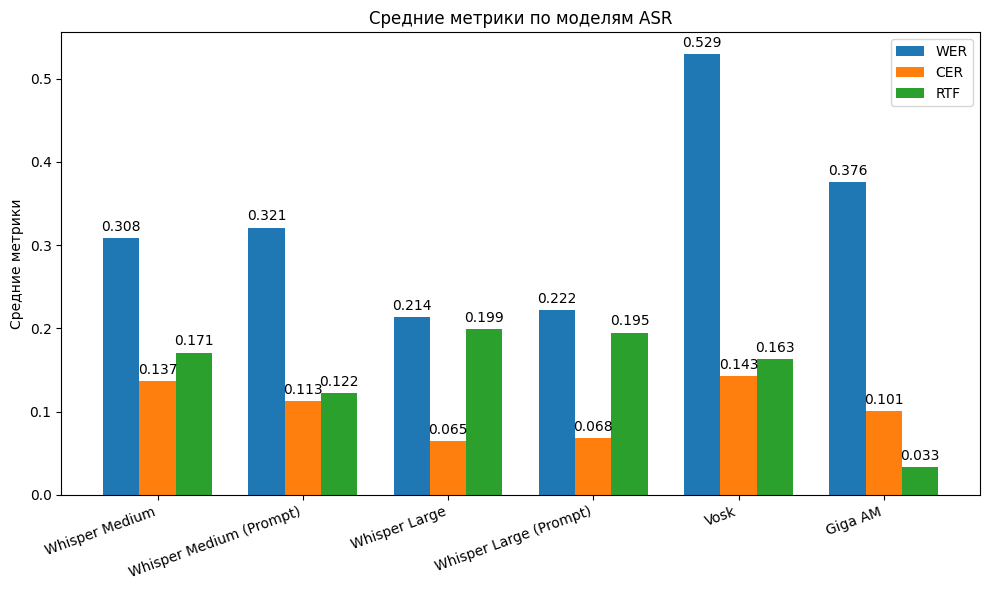

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

# Исправленные названия моделей (Large вместо Small)
models = [
    'Whisper Medium',
    'Whisper Medium (Prompt)',
    'Whisper Large',
    'Whisper Large (Prompt)',
    'Vosk',
    'Giga AM'
]
WER = [0.308, 0.321, 0.214, 0.222, 0.529, 0.376]
CER = [0.137, 0.113, 0.065, 0.068, 0.143, 0.101]
RTF = [0.171, 0.122, 0.199, 0.195, 0.163, 0.033]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, WER, width, label='WER')
rects2 = ax.bar(x, CER, width, label='CER')
rects3 = ax.bar(x + width, RTF, width, label='RTF')

ax.set_ylabel('Средние метрики')
ax.set_title('Средние метрики по моделям ASR')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20, ha='right')
ax.legend()

for rects in [rects1, rects2, rects3]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, WER, width, label='WER')
rects2 = ax.bar(x, CER, width, label='CER')
rects3 = ax.bar(x + width, RTF, width, label='RTF')

ax.set_ylabel('Средние метрики')
ax.set_title('Средние метрики по моделям ASR')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20, ha='right')
ax.legend()

for rects in [rects1, rects2, rects3]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()
